In [1]:
import sklearn
import pandas as pd
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 결정 트리
- 결정에 다다르기 위해 예/아니오 질문을 이어나가며 학습한다. 
- 질문이나 정답을 담은 것을 Node, 말단 노드를 Leaf, 연결선을 Edge 라고 한다. 
- 머신러닝에서는 아래는 생존과 사망을 구분하는 모델을 만든 것이다. 
- 이런 모델을 직접 만드는 대신 지도 학습 방식으로 데이터로부터 학습시켜 결정트리를 구축할 수 있다. 

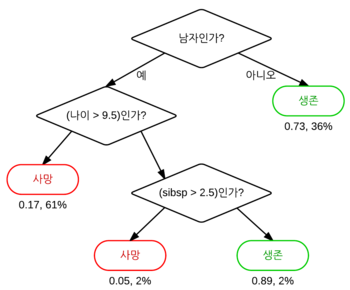

## 결정트리 만들기
- 데이터셋에 존재하는 데이터포인트들을 크게 두개로 나눌수 있는 정보를 골라서 루트노드(맨 위 노드)로 한다. 이 시점에서 깊이가 1이된다. 
- 두개로 나누어진 각 영역에서 각자 크게 두개로 나눌수 있는 정보를 골라서 노드를 만든다. -> 깊이2
- 이를 반복한다. 반복할 수록 깊이가 깊어진다. 
- 이런식으로 반복된 프로세스는 각 노드가 테스트 하나씩(Leaf)을 가질 때까지 반복하여 이진 결정 트리를 구축한다. 
- 나누다보면 딱 하나의 타깃값만을 가지는 리프 노드가 생길 수있는데 이를 순수노드(pure node)라고 한다. 
- 회귀 문제에서는 각 노드의 테스트 결과에 따라 트리를 탐색해나가고, 새로운 데이터 포인트에 해당하는 리프노드를 찾는다. 찾은 리프노드의 훈련 데이터의 평균값이 데이터 포인트의 출력이된다. 


# 결정트리의 복잡도
- 모든 리프 노드가 순수 노드가 될 때까지 진행하면 모델이 매우 복잡해지고, overfitting 된다. 
- 이를 막기위해 트리 생성을 일찍 중단하는 전략(사전 가지치기 : pre-pruning)과 트리를 만든 후 데이터 포인트가 적은 노드를 삭제하거나 병합하는 전략이 있다. 
- 사전 가지치기 방법은 트리의 최대 깊이(max_depth)나 리프의 최대 개수(max_leaf_nodes)를 제한하거나, 노드가 분할하기 위한 포인트의 최소 개수(min_samples_leaf)를 지정한다. 
- sklearn에서는 사전가지치기만 지원

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


- 결정 트리를 제한하지 않았기 때문에, 훈련 데이터의 모든 레이블을 완벽하게 기억할 만큼 충분히 깊게 만들어졌다. 
- 과대적합하기 쉽고 새로운 데이터에 일반화 되지 않는다. 
- 이번에는 사전 가지치기 기법을 통해 max_depth =4 의 매개변수를 주어 연속된 질문을 최대 4개로 제한하여 과대적합을 줄인다. 


In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)
print('훈련 세트 정확도 : {:.3f}'.format(tree.score(X_train, y_train)))
print('테스트 세트 정확도 : {:.3f}'.format(tree.score(X_test, y_test)))

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


# 결정 트리 분석
 - export_graphviz 함수를 이용해 트리를 시각화한다. (.dot 파일 만들어줌)
 - graphviz 라이브러리로 시각화 진행(.dot 파일을 읽을 수있는 라이브러리)

In [9]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file = 'tree.dot', class_names=['악성', '양성'],
                feature_names = cancer.feature_names, impurity=False, filled=True)


In [22]:

import graphviz
with open('tree.dot', encoding = 'utf-8') as f:
    dot_graph = f.read()
print(dot_graph)
graphviz.Source(dot_graph).view()

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="worst radius <= 16.795\nsamples = 426\nvalue = [159, 267]\nclass = 양성", fillcolor="#399de567"] ;
1 [label="worst concave points <= 0.1359\nsamples = 284\nvalue = [25, 259]\nclass = 양성", fillcolor="#399de5e6"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="radius error <= 1.0475\nsamples = 252\nvalue = [4, 248]\nclass = 양성", fillcolor="#399de5fb"] ;
1 -> 2 ;
3 [label="smoothness error <= 0.0033\nsamples = 251\nvalue = [3, 248]\nclass = 양성", fillcolor="#399de5fc"] ;
2 -> 3 ;
4 [label="samples = 4\nvalue = [1, 3]\nclass = 양성", fillcolor="#399de5aa"] ;
3 -> 4 ;
5 [label="samples = 247\nvalue = [2, 245]\nclass = 양성", fillcolor="#399de5fd"] ;
3 -> 5 ;
6 [label="samples = 1\nvalue = [1, 0]\nclass = 악성", fillcolor="#e58139ff"] ;
2 -> 6 ;
7 [label="worst texture <= 25.62\nsamples = 32\nvalue = [21, 11]\nclass = 악성", fillcolor="#e5813979"] ;
1 -> 7 ;
8 [label="worst smoothness <= 0.1786\nsamples

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'Source.gv'], make sure the Graphviz executables are on your systems' PATH